In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join(r'..\movingrange'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
import movingrange
import numpy as np
import pandas as pd

In [8]:
import importlib

In [9]:
importlib.reload(movingrange)

number_of_records = 200
values = np.random.randint(1,51,number_of_records)
periods = range(number_of_records)

x = movingrange.movingrange()
x.load_from_arrays(periods, values)

In [10]:
x.rules.basic_rules()

{'Rule 1': [],
 'Rule 2': [20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163]}

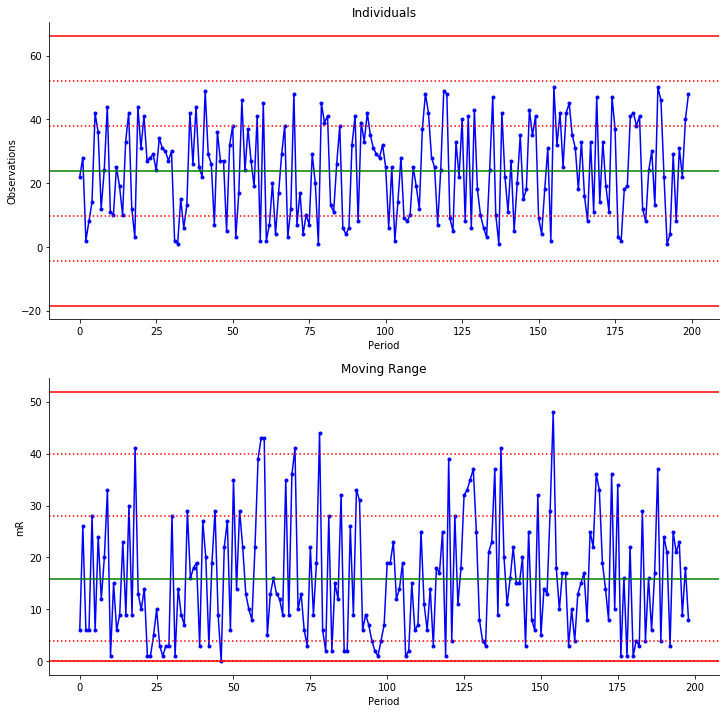

In [11]:
x.plot()

In [ ]:
x.moving_range_describe()

In [ ]:
x.individuals_describe()

In [ ]:
dir(movingrange)